In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/PROJECT/Dataset/trial/karimnagar_T.csv")


In [ ]:
df

,Unnamed: 0,Date,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
0,0,1/1/2018,0.0,13.6,33.2,32.0,47.7,0.0,2.9,F
1,1,1/2/2018,0.0,13.3,34.3,37.1,45.7,0.0,2.2,F
2,2,1/3/2018,0.0,13.0,33.2,37.7,55.2,0.0,3.5,F
3,3,1/4/2018,0.0,11.8,33.4,33.5,61.0,0.0,0.8,F
4,4,1/5/2018,0.0,12.3,32.9,31.6,53.2,0.0,2.6,F
...,...,...,...,...,...,...,...,...,...,...
1729,1729,9/26/2022,0.0,24.1,32.8,58.4,98.6,0.0,7.8,F
1730,1730,9/27/2022,0.0,24.1,33.3,62.5,94.3,0.0,10.4,F
1731,1731,9/28/2022,0.0,24.8,32.3,69.0,98.0,0.0,6.5,F
1732,1732,9/29/2022,23.9,24.0,32.1,70.3,98.9,0.0,7.1,F


In [ ]:
df1=df.drop(columns=["Date","heat_w","Unnamed: 0"])
#df1=df.drop(columns=["heat_w"])

In [ ]:
#print(df1.iloc[0:,6])
X = df1.iloc[:,:8]  #independent columns
y = df.iloc[:,9]    #target column i.e price range
print(X)
#print(y)
if(np.NaN in X.values):
  print("oooo")

      cumm_rainfall  temp_min  temp_max  humidity_min  humidity_max  \
0               0.0      13.6      33.2          32.0          47.7   
1               0.0      13.3      34.3          37.1          45.7   
2               0.0      13.0      33.2          37.7          55.2   
3               0.0      11.8      33.4          33.5          61.0   
4               0.0      12.3      32.9          31.6          53.2   
...             ...       ...       ...           ...           ...   
1729            0.0      24.1      32.8          58.4          98.6   
1730            0.0      24.1      33.3          62.5          94.3   
1731            0.0      24.8      32.3          69.0          98.0   
1732           23.9      24.0      32.1          70.3          98.9   
1733            5.6      23.2      32.6          71.1          98.7   

      wind_speed_min  wind_speed_max  
0                0.0             2.9  
1                0.0             2.2  
2                0.0          

In [ ]:
print(y)

0       F
1       F
2       F
3       F
4       F
       ..
1729    F
1730    F
1731    F
1732    F
1733    F
Name: heat_w, Length: 1734, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(y)
# Fit and transform the categorical feature using LabelEncoder
y = le.fit_transform(y)
print(y)

0       F
1       F
2       F
3       F
4       F
       ..
1729    F
1730    F
1731    F
1732    F
1733    F
Name: heat_w, Length: 1734, dtype: object
[0 0 0 ... 0 0 0]


[0.012147   0.17404946 0.44031088 0.164305   0.10408639 0.03445164
 0.07064964]


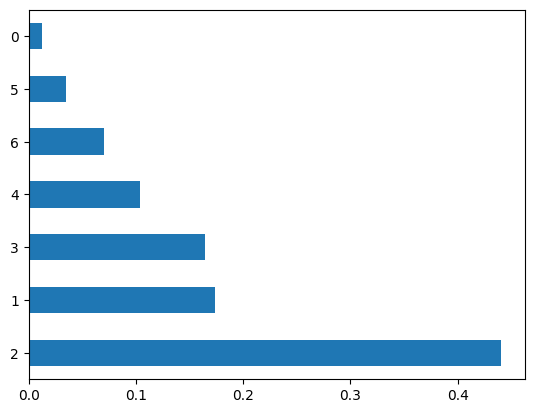

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()